Map colouring:

Enter the number of nodes: 4
Enter node 1: 4
Enter node 2: 3
Enter node 3: 4
Enter node 4: 
Enter the number of edges: 5
Enter edge 1 (format: node1 node2): 1 2
Enter edge 2 (format: node1 node2): 1 3 
Enter edge 3 (format: node1 node2): 2 3
Enter edge 4 (format: node1 node2): 3 4
Enter edge 5 (format: node1 node2): 1 4
Enter the number of colors: 3
Enter color 1: r
Enter color 2: y
Enter color 3: b


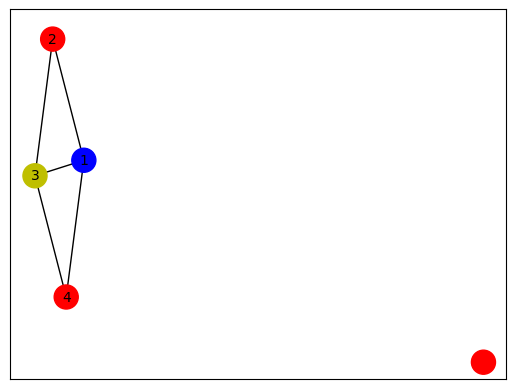

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the nodes and edges from the user
num_nodes = int(input("Enter the number of nodes: "))
nodes = []
for i in range(num_nodes):
    node = input(f"Enter node {i+1}: ")
    nodes.append(node)

num_edges = int(input("Enter the number of edges: "))
edges = []
for i in range(num_edges):
    edge = input(f"Enter edge {i+1} (format: node1 node2): ").split()
    edges.append(tuple(edge))

# Get the colors from the user
num_colors = int(input("Enter the number of colors: "))
colors = []
for i in range(num_colors):
    color = input(f"Enter color {i+1}: ")
    colors.append(color)

# Define the map as a graph
G = nx.Graph()
G.add_nodes_from(nodes)  # nodes
G.add_edges_from(edges)  # edges

# Function to check if a color is safe for a node
def is_safe(node, color, colored_nodes):
    for neighbor in G.neighbors(node):
        if neighbor in colored_nodes and colored_nodes[neighbor] == color:
            return False
    return True

# Function to color the map
def color_map():
    colored_nodes = {}
    for node in G.nodes():
        for color in colors:
            if is_safe(node, color, colored_nodes):
                colored_nodes[node] = color
                break
        else:
            return None  # cannot color the node with the given colors
    return colored_nodes

# Color the map
colored_nodes = color_map()

if colored_nodes is None:
    print("Insufficient colors to color the graph.")
else:
    # Draw the graph with colors
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=[colored_nodes[node] for node in G.nodes()])
    nx.draw_networkx_edges(G, pos, edge_color='black')
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.show()2